# Wordclouds

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from pathlib import Path

/home/valentin/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Download reference images

In [2]:
Path("images").mkdir(parents=True, exist_ok=True)

In [3]:
!curl https://upload.wikimedia.org/wikipedia/fr/thumb/6/68/Logo_JO_d%27%C3%A9t%C3%A9_-_Paris_2024.svg/1800px-Logo_JO_d%27%C3%A9t%C3%A9_-_Paris_2024.svg.png -o images/logo_paris_2024.svg.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  133k  100  133k    0     0   568k      0 --:--:-- --:--:-- --:--:--  570k


## Load words dataset

In [4]:
athletes = pd.read_csv('data/athletes_updated.csv')
sports = athletes['sport'].unique()
countries = athletes['team'].unique()

## Wordcloud on the Paris 2024 Logo

In [5]:
olympics_logo = np.array(Image.open("logo_paris_2024.svg.png"))
olympics_mask = olympics_logo.copy()

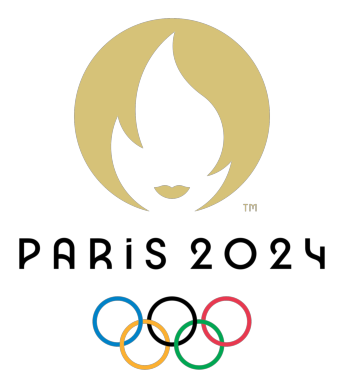

In [6]:
plt.imshow(olympics_logo)
plt.axis("off")
plt.show()

In [7]:
logo_color = olympics_logo[250,1000].copy()
logo_color

array([214, 194, 120, 255], dtype=uint8)

In [8]:
olympics_mask[olympics_mask != logo_color] = 255
olympics_mask[olympics_mask == logo_color] = 0

In [9]:
color_func = lambda *args, **kwargs: "rgb({}, {}, {})".format(*[158, 141, 70, 255])
wordcloud = WordCloud(background_color="rgba(214, 194, 120, 0)", mode="RGBA", mask=olympics_mask)
wordcloud = wordcloud.generate(' '.join(sports))
wordcloud = wordcloud.recolor(color_func=color_func)

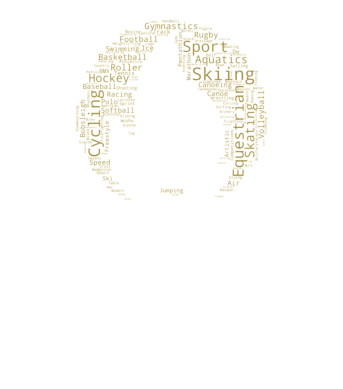

In [10]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
wordcloud.to_file('images/logo_paris_2024_wordcloud_mask.png')

In [12]:
olympics_wordcloud = np.array(Image.open("images/logo_paris_2024_wordcloud_mask.png"))

In [13]:
olympics_logo = np.array(Image.open("logo_paris_2024.svg.png"))
cond = (olympics_logo[:, :, :3] == logo_color[:3])
olympics_logo[:, :, :3][cond] = olympics_wordcloud[:, :, :3][cond]

In [14]:
im = Image.fromarray(olympics_logo)
im.save("images/logo_paris_2024_wordcloud.png")

(-0.5, 1799.5, 2053.5, -0.5)

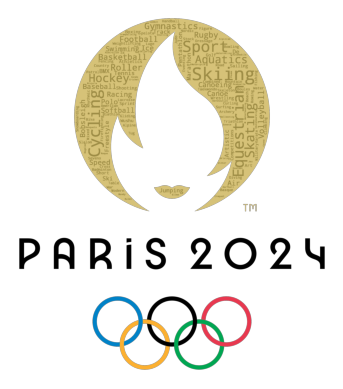

In [15]:
plt.imshow(olympics_logo)
plt.axis("off")

## Wordcloud on teams

In [16]:
wordcloud = WordCloud(background_color="rgba(0, 0, 0, 0)", mode="RGBA")
wordcloud = wordcloud.generate(' '.join(countries))

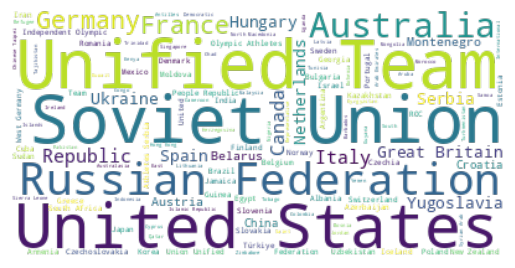

In [17]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()